In [140]:
# Import Libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
# Generate Data
D = 100

N_train = 25
noise_train = np.random.normal(0,0.3,(D,N_train,1))
x_train = np.sort(np.random.uniform(0,1,(D,N_train,1)),axis=1)
t_train = np.sin(2*np.pi*x_train) + noise_train


N_test = 1000
noise_test = np.random.normal(0,0.3,(D,N_test,1))
x_test = np.sort(np.random.uniform(0,1,(D,N_test,1)),axis=1)
t_test = np.sin(2*np.pi*x_test) + noise_test

In [142]:
# Method for non-linear mapping
def gaussian_mapping(x,M,s):
    s = s**2
    N = len(x)
    phi = np.zeros((N,M))
    loc_of_gauss = np.linspace(0,1,M)
    for i in range(N):
        phi[i,:] = np.exp(-1*np.power(x[i] - loc_of_gauss.T,2)/(2*s)) 
    
    phi_t = np.hstack((np.ones((N,1)),phi))
    
    return phi_t

# Closed Form
def train(x,t,M,lamb):
    return np.linalg.inv(x.T@x+lamb*np.eye(M+1)) @ x.T @ t

def cost_function(f_x,t):
    cost = np.sum(np.power(f_x - t,2))
    return cost

def calculate(x_train,t,N,M,D,lambdas,plot=False):
    x_mesh = np.linspace(0,1,N).reshape(N,1)
    phi_mesh = gaussian_mapping(x_mesh,M,0.1)
    f_x = []
    y_mesh = np.zeros((len(lambdas), D, N,1))
    w = np.zeros((len(lambdas), D,M+1,1))
    h_x = np.sin(2*np.pi*x_mesh)

    for j in range(len(lambdas)):
        for i in range(D):
            phi_train = gaussian_mapping(x_train[i],M,0.1)
            w[j,i,:] = train(phi_train,t[i],M,lambdas[j])
            
            if plot:
                y_mesh[j,i,:] = phi_mesh@w[j,i]
                plt.plot(x_mesh,y_mesh[j,i,:],'r')
                plt.ylim([-2,2])
                plt.title('ln(lambda): ' + str(np.log(lambdas[j])))
        if plot:
            plt.figure()
        f_x.append(np.mean(y_mesh[j],axis=0))

    if plot:
        for j in range(len(lambdas)):
            plt.figure()
            plt.plot(x_mesh, h_x,'g')
            plt.plot(x_mesh,f_x[j],'r')
            plt.ylim([-1.5,1.5])
            plt.title('Average ln(lambda): ' + str(np.log(lambdas[j])))
    return w

def predict_estimate(x, lambdas, D, N, w):
    y_estimates_test = np.zeros((len(lambdas), D, N,1))
    phi = []
    
    for i in range(D):
        phi = gaussian_mapping(x[i],M,0.1)
        for j in range(len(lambdas)):
            y_estimates_test[j,i,:] = phi@w[j,i]
#             plt.plot(y_estimates_test[j,i,:])
    return y_estimates_test

def calcualte_bias_variance(w, lambdas, y_hat):
    N = 25
    x_mesh = np.linspace(0,1,N).reshape(N,1)
    phi_mesh = gaussian_mapping(x_mesh,M,0.1)
    h_x = np.sin(2*np.pi*x_mesh)
    f_x = []
    y = np.zeros((len(lambdas), D, N,1))
    ln_lambdas = np.log(lambdas)
    E = np.zeros((len(lambdas),1))
    
    for j in range(len(lambdas)):
        for i in range(D):
            y[j,i,:] = phi_mesh@w[j,i]
        f_x.append(np.mean(y[j],axis=0))
        
    # Calculate Bias
    bias_sq = np.zeros((len(lambdas),1))
    for i in range(len(lambdas)):
        bias_sq[i] = np.mean(np.power(f_x[i]-h_x,2))

    # Calculate Variance
    variance = np.zeros((len(lambdas),1))
    for i in range(len(lambdas)):
        variance[i] = np.mean(np.mean(np.power(y[i]-f_x[i],2),axis=0))
        
        
    N = 1000
    x_mesh = np.linspace(0,1,N).reshape(N,1)
    true_avg = np.mean(t_test,0)
    for i in range(len(lambdas)):
        E[i] = np.sqrt(cost_function(true_avg,np.mean(y_hat[i],0))/N)

    plt.plot(ln_lambdas,bias_sq,'b')
    plt.plot(ln_lambdas,variance,'r')
    plt.plot(ln_lambdas,bias_sq+variance,'g')
    plt.plot(ln_lambdas,(E))

    plt.legend(['(bias)^2','variance','bias^2 + variance','Test Error'])
    plt.ylim([0, 0.15])



In [143]:
# M = 50
# ln_lambda = [2.6,-0.31,-2.6]
# lambdas = np.exp(ln_lambda)
# f_x = calculate(x_train,t_train,N_train,M,D,lambdas,True)

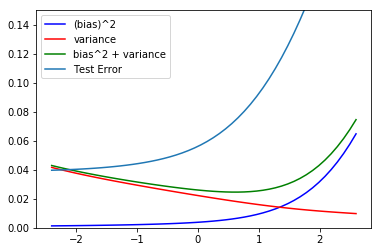

In [144]:
M = 25
ln_lambdas = np.linspace(-2.4,2.6,50)
lambdas = np.exp(ln_lambdas)
w = calculate(x_train,t_train,N_train,M,D,lambdas,False)

y_hat = predict_estimate(x_test, lambdas, D, N_test, w)

calcualte_bias_variance(w, lambdas,y_hat)
plt.show()